In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scps

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

## Covariance

$$Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$

In [3]:
def covariance(X):
    X = X - X.mean(axis=0)
    X = (X.T @ X) / (len(X)-1)
    return X

In [4]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=7, size=1000)
X = np.vstack((x, y)).T

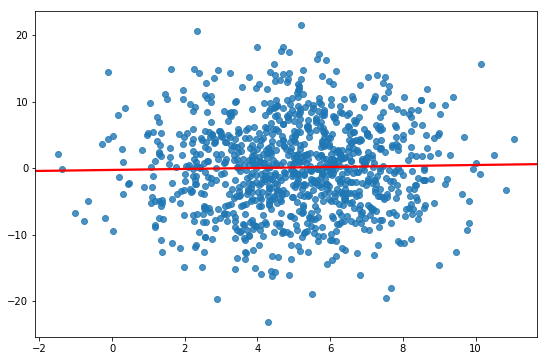

In [5]:
line_kws = {'color':'red'}
sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [6]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np.isclose(np_cov, cov)

Covariance matrix from numpy

[[ 4.25504841  0.3158209 ]
 [ 0.3158209  46.87446923]]


Our covariance matrix

[[ 4.25504841  0.3158209 ]
 [ 0.3158209  46.87446923]]




array([[ True,  True],
       [ True,  True]])

Normally the covariancd matrix doesn't tell us much but is an intermediate step to calculating the correlation matrix.

<hr>

## Correlation

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [7]:
def correlation(X):
    cov = covariance(X)
    std = X.std(axis=0, ddof=1).reshape(-1, 1) @ X.std(axis=0, ddof=1).reshape(1, -1)
    
    return cov / std

### Generating uncorrelated data

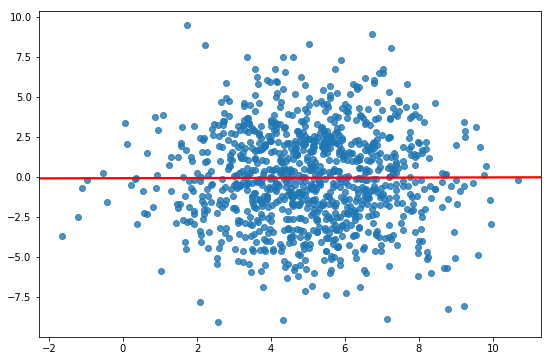

In [8]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)

X = np.vstack((x, y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [9]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np.isclose(np_cov, cov)

Covariance matrix from numpy

[[3.57885046 0.0175697 ]
 [0.0175697  8.98315351]]


Our covariance matrix

[[3.57885046 0.0175697 ]
 [0.0175697  8.98315351]]




array([[ True,  True],
       [ True,  True]])

### Generating correlated data

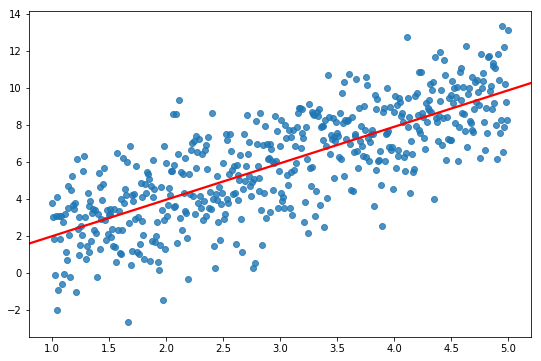

In [10]:
x = np.linspace(1, 5, 500)
y = 2 * x + np.random.normal(scale=2, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [11]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np.isclose(np_cov, cov)

Covariance matrix from numpy

[[1.34136007 2.64042045]
 [2.64042045 8.7741402 ]]


Our covariance matrix

[[1.34136007 2.64042045]
 [2.64042045 8.7741402 ]]




array([[ True,  True],
       [ True,  True]])

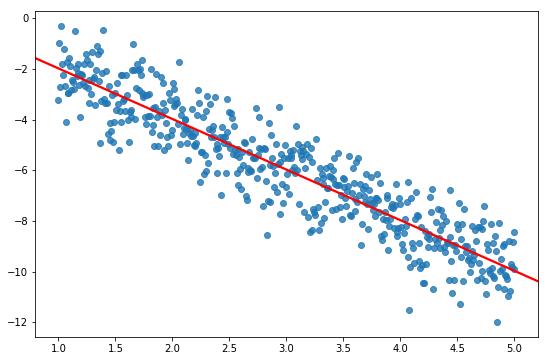

In [12]:
x = np.linspace(1, 5, 500)
y = -2 * x + np.random.normal(scale=1, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [13]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np.isclose(np_cov, cov)

Covariance matrix from numpy

[[ 1.34136007 -2.68062898]
 [-2.68062898  6.28309224]]


Our covariance matrix

[[ 1.34136007 -2.68062898]
 [-2.68062898  6.28309224]]




array([[ True,  True],
       [ True,  True]])

### Correlation for a 4 feature matrix

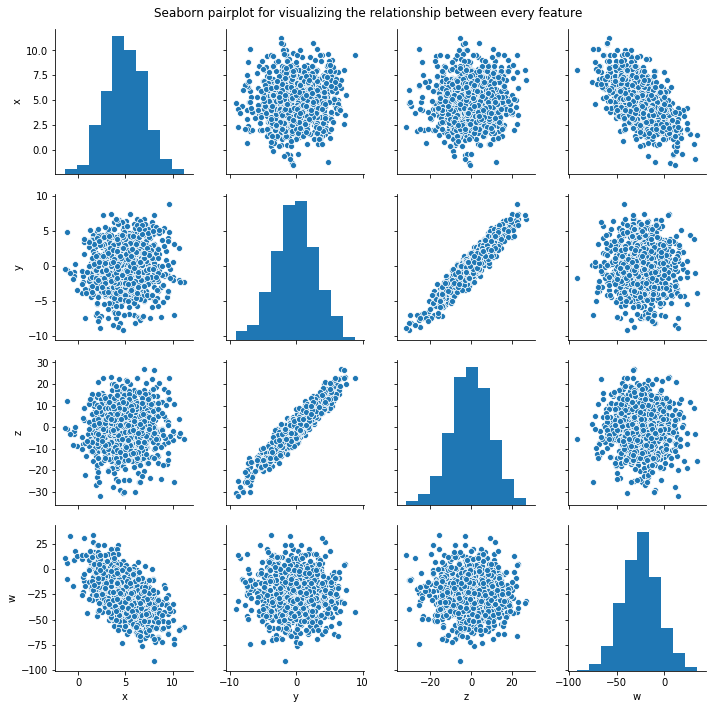

In [14]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)
z = 3 * y + np.random.normal(scale=3, size=1000)
w = -5 * x + np.random.normal(scale=15, size=1000)

X = np.vstack((x, y, z, w)).T
df_X = pd.DataFrame(X, columns=['x', 'y', 'z', 'w'])

sns.pairplot(df_X)
plt.suptitle('Seaborn pairplot for visualizing the relationship between every feature')
plt.subplots_adjust(top=0.95)

In [15]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np.isclose(np_cov, cov)

Covariance matrix from numpy

[[  4.27126353   0.39426566   1.23712197 -21.77266148]
 [  0.39426566   9.31168403  28.13037901  -1.05875253]
 [  1.23712197  28.13037901  94.23624121  -2.58648617]
 [-21.77266148  -1.05875253  -2.58648617 351.46785552]]


Our covariance matrix

[[  4.27126353   0.39426566   1.23712197 -21.77266148]
 [  0.39426566   9.31168403  28.13037901  -1.05875253]
 [  1.23712197  28.13037901  94.23624121  -2.58648617]
 [-21.77266148  -1.05875253  -2.58648617 351.46785552]]




array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Visualizing the correlation matrix


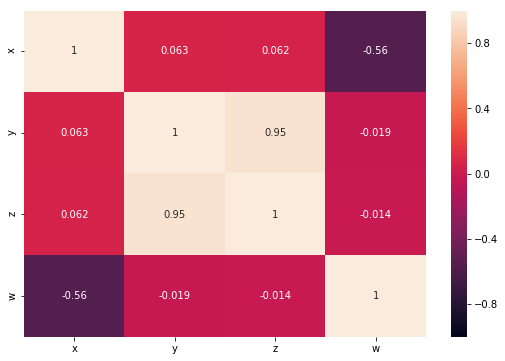

In [16]:
sns.heatmap(df_X.corr(), linewidths=0, vmin=-1, vmax=1, annot=True);